presentation: https://www.canva.com/design/DAGrd5UQDPI/2YrnNQe8-gSQmqKZ-1Bu_Q/edit?utm_content=DAGrd5UQDPI&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

## 📦 Importing Libraries

In [ ]:
# 📦 Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/project_dataset.csv')

In [ ]:
df.head()

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,0,1.0,24924.50,42.31,2.572,211.096358,8.106
1,2010-02-05,0,26.0,11737.12,42.31,2.572,211.096358,8.106
2,2010-02-05,0,17.0,13223.76,42.31,2.572,211.096358,8.106
3,2010-02-05,0,45.0,37.44,42.31,2.572,211.096358,8.106
4,2010-02-05,0,28.0,1085.29,42.31,2.572,211.096358,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10244 entries, 0 to 10243
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10244 non-null  object 
 1   IsHoliday     10244 non-null  int64  
 2   Dept          10244 non-null  float64
 3   Weekly_Sales  10244 non-null  float64
 4   Temperature   10244 non-null  float64
 5   Fuel_Price    10244 non-null  float64
 6   CPI           10244 non-null  float64
 7   Unemployment  10244 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 640.4+ KB


In [ ]:
df["Dept"].value_counts()

,count
Dept,
1.0,143
26.0,143
17.0,143
28.0,143
79.0,143
...,...
99.0,37
51.0,33
47.0,22


In [ ]:
dept_26 = df[df['Dept'] == 26.0].copy()

In [ ]:
dept_26.head()

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
1,2010-02-05,0,26.0,11737.12,42.31,2.572,211.096358,8.106
109,2010-02-12,1,26.0,10050.92,38.51,2.548,211.242170,8.106
204,2010-02-19,0,26.0,10547.60,39.93,2.514,211.289143,8.106
259,2010-02-26,0,26.0,8541.14,46.63,2.561,211.319643,8.106
326,2010-03-05,0,26.0,8772.65,46.50,2.625,211.350143,8.106


In [ ]:
dept_26['Date'] = pd.to_datetime(dept_26['Date'])
dept_26.sort_values('Date', inplace=True)

In [ ]:
dept_26.set_index('Date', inplace=True)

In [ ]:
dept_26.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IsHoliday     143 non-null    int64  
 1   Dept          143 non-null    float64
 2   Weekly_Sales  143 non-null    float64
 3   Temperature   143 non-null    float64
 4   Fuel_Price    143 non-null    float64
 5   CPI           143 non-null    float64
 6   Unemployment  143 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.9 KB


In [ ]:
dept_26.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,0,26.0,11737.12,42.31,2.572,211.096358,8.106
2010-02-12,1,26.0,10050.92,38.51,2.548,211.242170,8.106
2010-02-19,0,26.0,10547.60,39.93,2.514,211.289143,8.106
2010-02-26,0,26.0,8541.14,46.63,2.561,211.319643,8.106
2010-03-05,0,26.0,8772.65,46.50,2.625,211.350143,8.106


# Plot the time series of Weekly Sales

### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

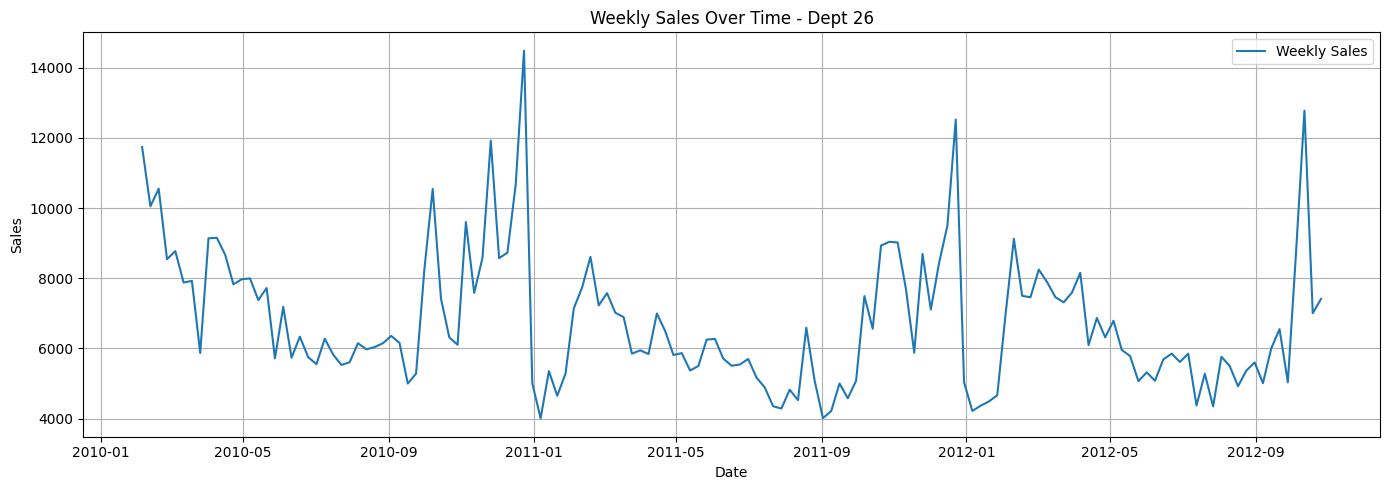

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(dept_26['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales Over Time - Dept 26')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Seasonal Decomposition

In [ ]:
decomposition = seasonal_decompose(dept_26['Weekly_Sales'], model='additive', period=52)

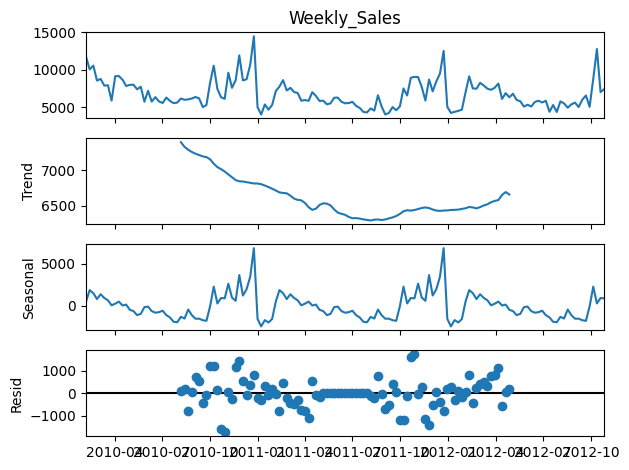

In [ ]:
decomposition.plot()
plt.tight_layout()
plt.show()

# ACF and PACF

### 🔍 ACF & PACF Analysis

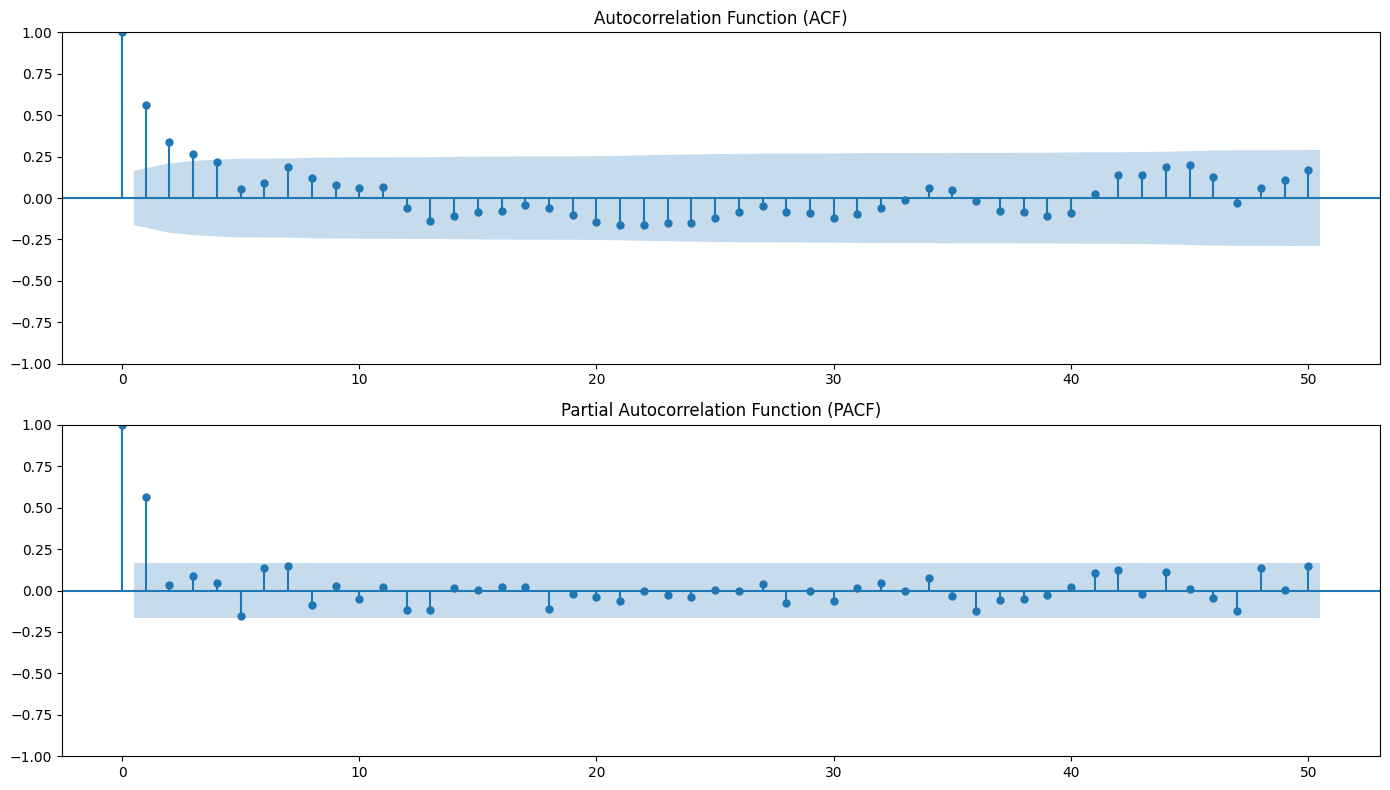

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(dept_26['Weekly_Sales'], ax=axes[0], lags=50)
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(dept_26['Weekly_Sales'], ax=axes[1], lags=50)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

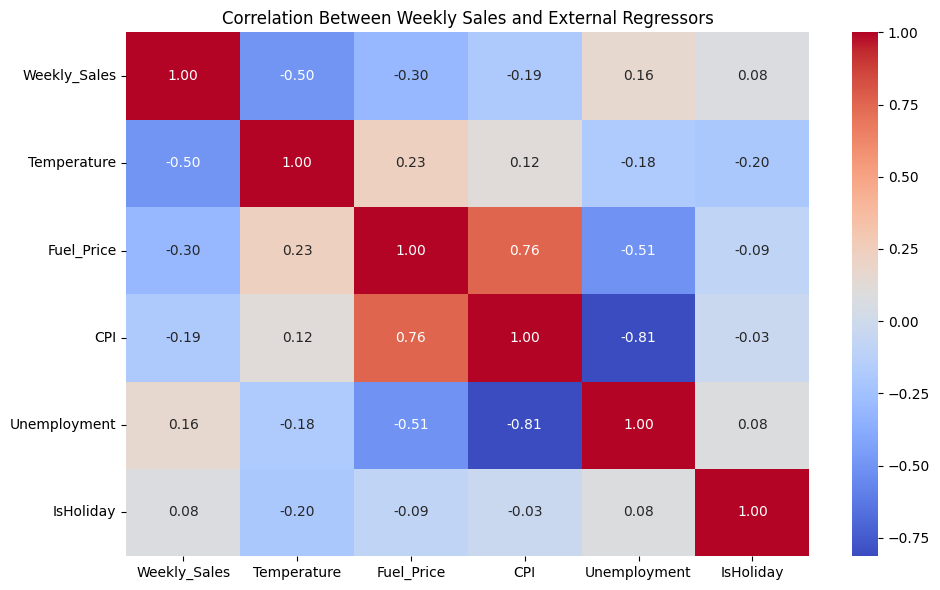

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = dept_26[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Weekly Sales and External Regressors')
plt.tight_layout()
plt.show()

### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

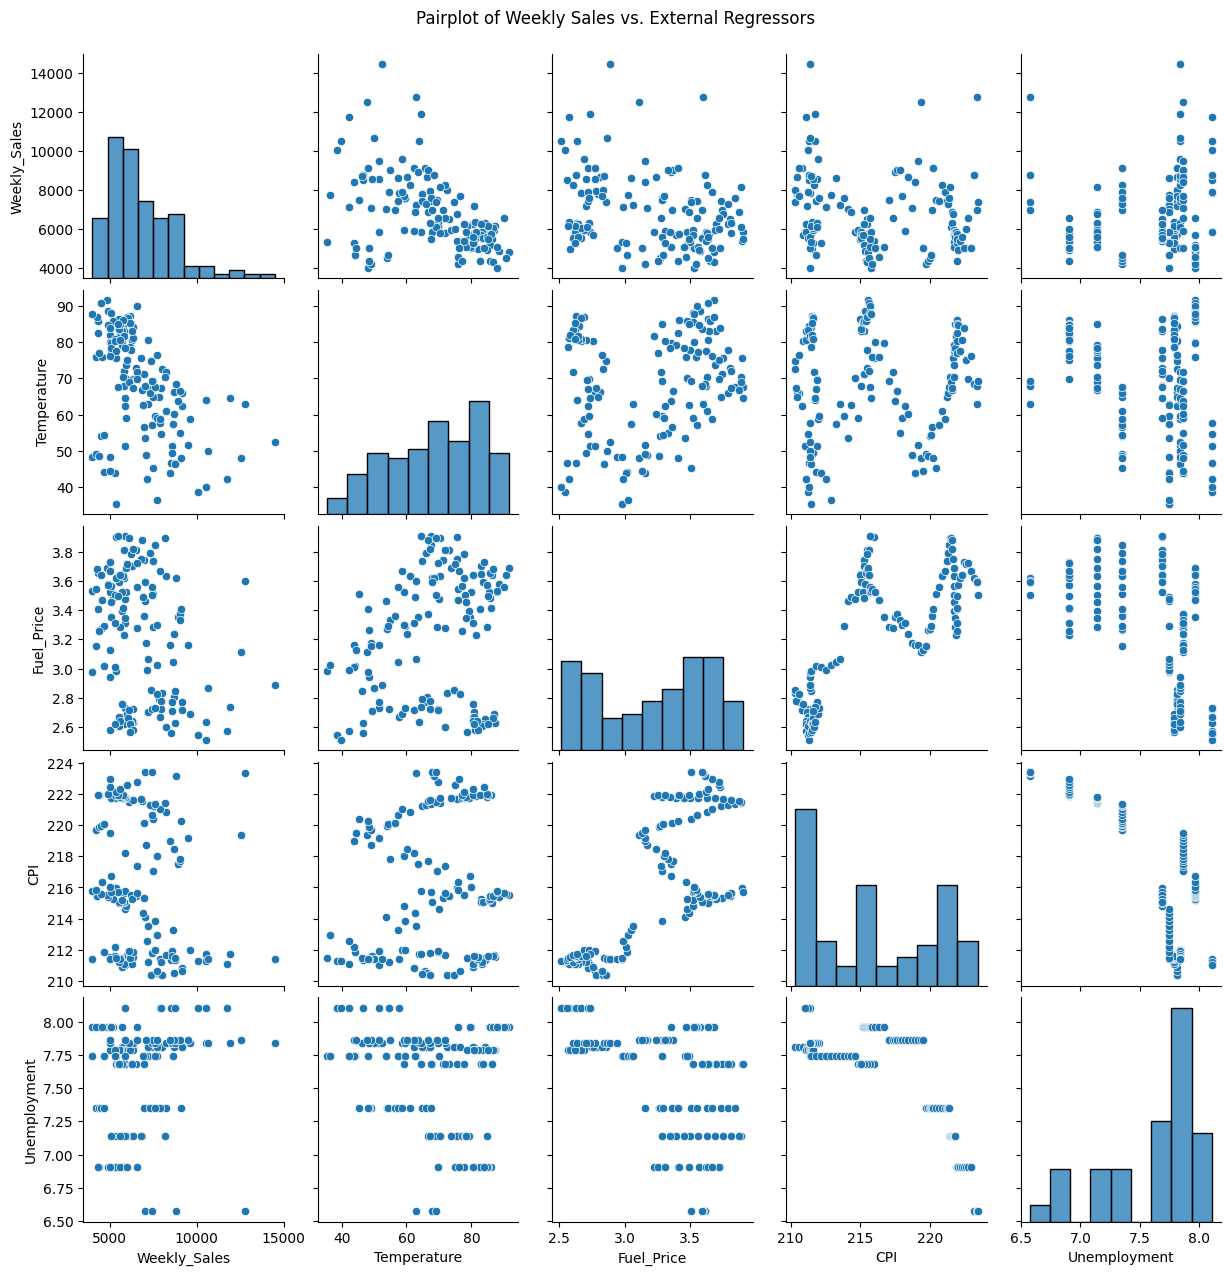

In [ ]:
sns.pairplot(dept_26[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.suptitle('Pairplot of Weekly Sales vs. External Regressors', y=1.02)
plt.show()

### 📈 Exponential Smoothing (Holt-Winters)

In [ ]:
# Use a hold-out strategy for evaluation (e.g., last 12 weeks for testing)
train = dept_26.iloc[:-12]
test = dept_26.iloc[-12:]

### 📈 Exponential Smoothing (Holt-Winters)

In [ ]:
holt_model = Holt(train['Weekly_Sales']).fit()
holt_forecast = holt_model.forecast(len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
hw_model = ExponentialSmoothing(train['Weekly_Sales'],
                                trend='add',
                                seasonal='add',
                                seasonal_periods=52).fit()
hw_forecast = hw_model.forecast(len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

### 📈 Exponential Smoothing (Holt-Winters)

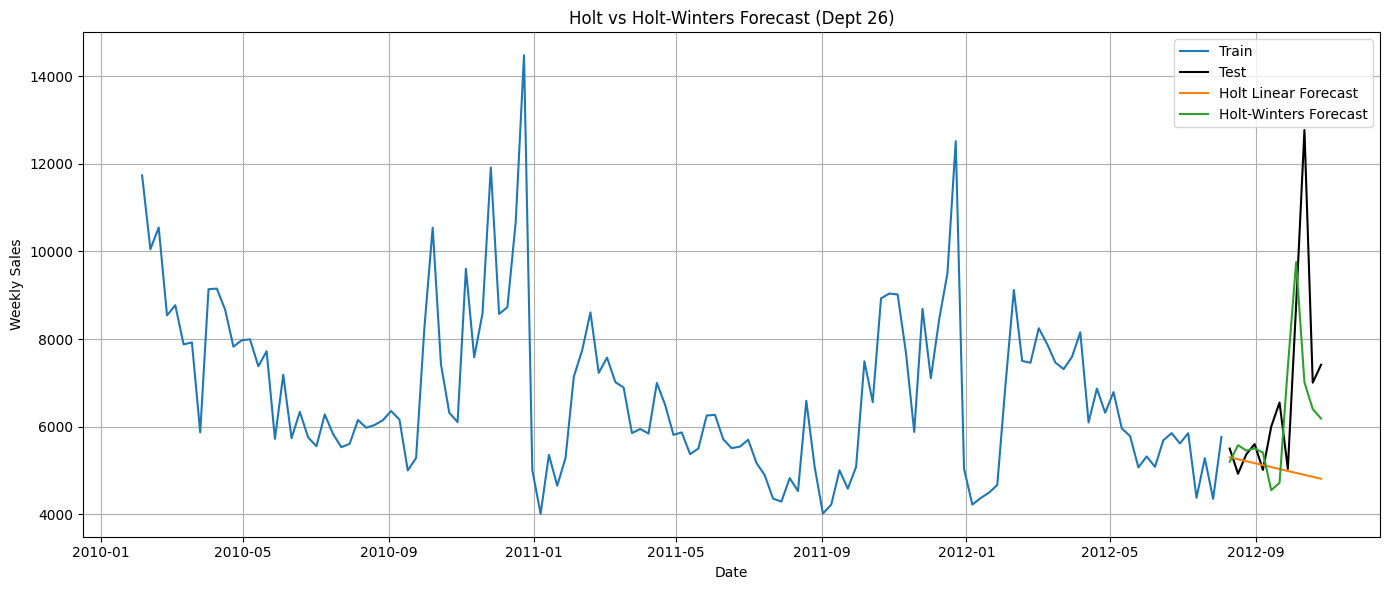

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test', color='black')
plt.plot(test.index, holt_forecast, label='Holt Linear Forecast')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast')
plt.title('Holt vs Holt-Winters Forecast (Dept 26)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Model Evaluation
Evaluation using RMSE and MAE metrics.

### 🔄 SARIMA / SARIMAX Modeling

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

### 📊 Model Evaluation
Evaluation using RMSE and MAE metrics.

In [ ]:
def evaluate_forecast(true, predicted):
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mae = mean_absolute_error(true, predicted)
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    return rmse, mae, mape

### 🔍 ACF & PACF Analysis
We use ACF and PACF plots to identify the appropriate lags and understand autocorrelation in the time series.

### 🔍 ACF & PACF Analysis

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming 'dept_26' already exists and is filtered
plt.figure(figsize=(14, 4))
plot_acf(dept_26['Weekly_Sales'], lags=40)
plt.title("ACF - Weekly Sales (Dept 26)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plot_pacf(dept_26['Weekly_Sales'], lags=40, method='ywm')
plt.title("PACF - Weekly Sales (Dept 26)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔄 Fitting SARIMA/SARIMAX Model
This block trains a seasonal ARIMA-based model on the training data.

### 🔄 SARIMA / SARIMAX Modeling

In [ ]:
sarima_model = SARIMAX(train['Weekly_Sales'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,52),
                       enforce_stationarity=False,
                       enforce_invertibility=False).fit(disp=False)

sarima_forecast = sarima_model.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


### 🔄 Fitting SARIMA/SARIMAX Model
This block trains a seasonal ARIMA-based model on the training data.

### 🔄 SARIMA / SARIMAX Modeling

In [ ]:
exog_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']
sarimax_model = SARIMAX(train['Weekly_Sales'],
                        exog=train[exog_vars],
                        order=(1,1,1),
                        seasonal_order=(1,1,1,52),
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=False)

sarimax_forecast = sarimax_model.forecast(steps=len(test), exog=test[exog_vars])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 🔄 SARIMA / SARIMAX Modeling

In [ ]:
sarima_metrics = evaluate_forecast(test['Weekly_Sales'], sarima_forecast)
sarimax_metrics = evaluate_forecast(test['Weekly_Sales'], sarimax_forecast)

### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

### 🔄 SARIMA / SARIMAX Modeling

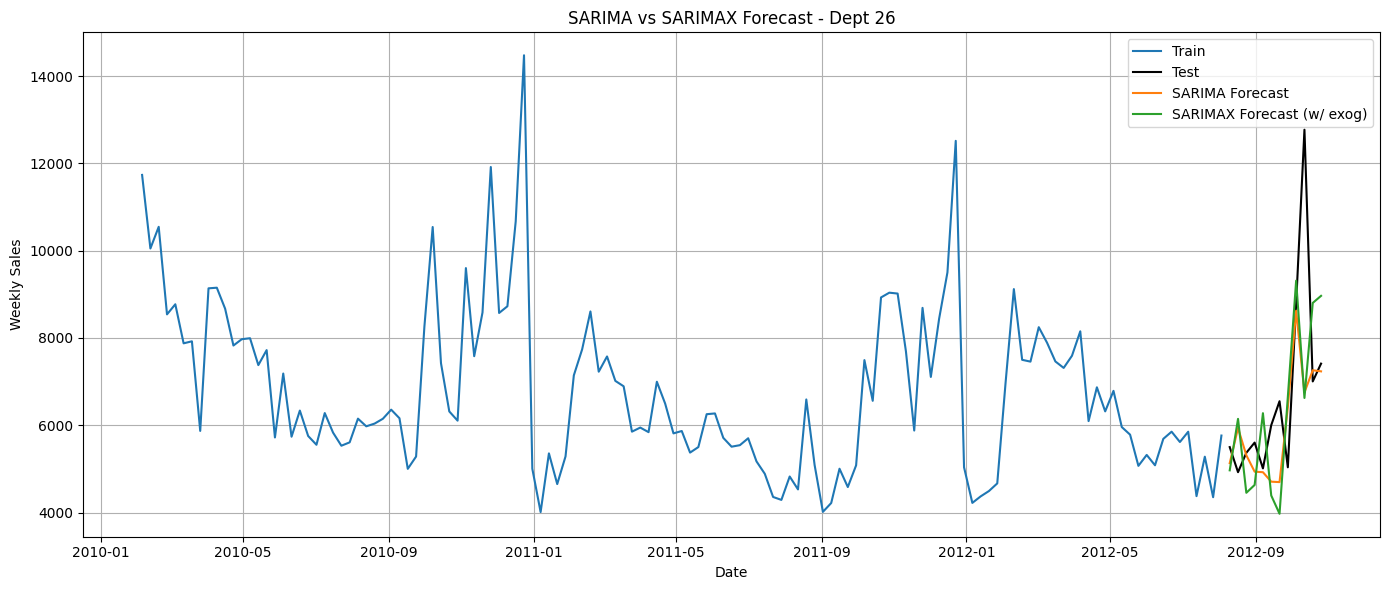

(np.float64(1936.9584313403454), 1111.2748002509243, np.float64(14.52097145086381))
(np.float64(2250.285490075311), 1729.010913667745, np.float64(24.44557130087552))


In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test', color='black')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.plot(test.index, sarimax_forecast, label='SARIMAX Forecast (w/ exog)')
plt.title('SARIMA vs SARIMAX Forecast - Dept 26')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(sarima_metrics)
print(sarimax_metrics)

### 🔄 Fitting SARIMA/SARIMAX Model
This block trains a seasonal ARIMA-based model on the training data.

### 🔄 SARIMA / SARIMAX Modeling

In [ ]:
simplified_sarimax = SARIMAX(train['Weekly_Sales'],
                             exog=train[exog_vars],
                             order=(1, 1, 0),
                             seasonal_order=(0, 1, 1, 52),
                             enforce_stationarity=False,
                             enforce_invertibility=False).fit(disp=False)

simplified_forecast = simplified_sarimax.forecast(steps=len(test), exog=test[exog_vars])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
simplified_metrics = evaluate_forecast(test['Weekly_Sales'], simplified_forecast)

### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

### 🔄 SARIMA / SARIMAX Modeling

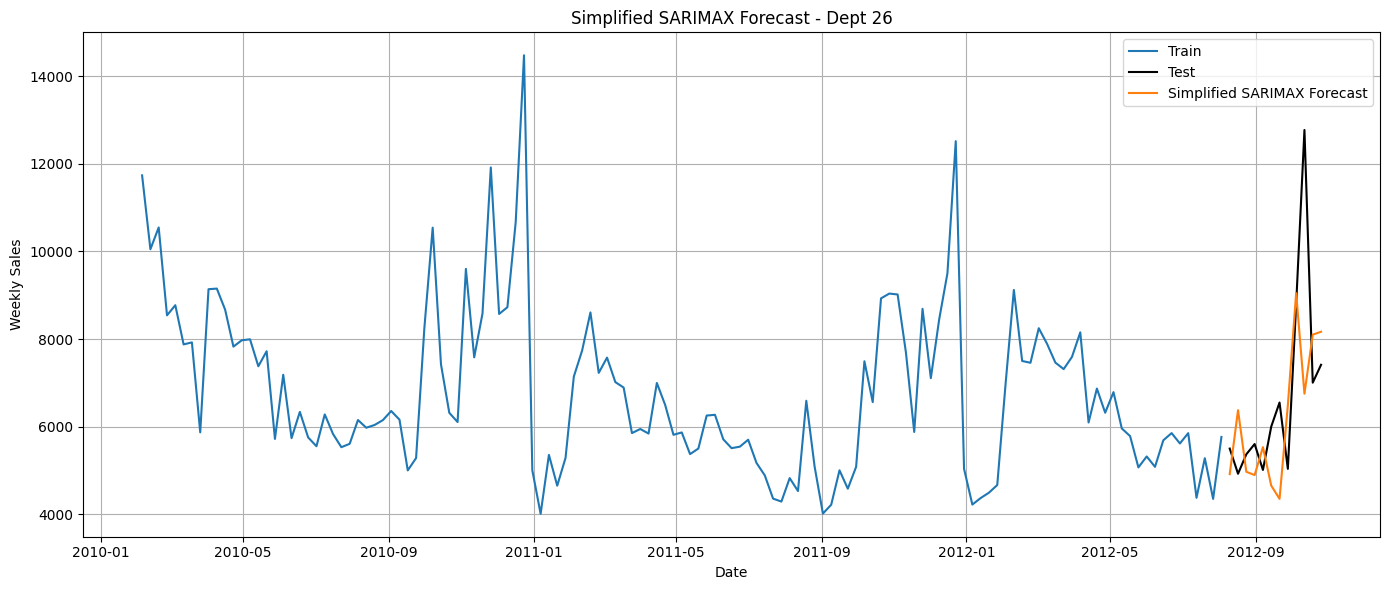

(np.float64(2046.1178929410048),
 1399.8703186064424,
 np.float64(19.283402623781864))

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test', color='black')
plt.plot(test.index, simplified_forecast, label='Simplified SARIMAX Forecast')
plt.title('Simplified SARIMAX Forecast - Dept 26')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

simplified_metrics

### 🔄 Fitting SARIMA/SARIMAX Model
This block trains a seasonal ARIMA-based model on the training data.

### 🔄 SARIMA / SARIMAX Modeling

In [ ]:
exog_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']

simplified_sarimax = SARIMAX(train['Weekly_Sales'],
                             exog=train[exog_vars],
                             order=(1, 1, 0),
                             seasonal_order=(0, 1, 1, 52),
                             enforce_stationarity=False,
                             enforce_invertibility=False).fit(disp=False)

simplified_forecast = simplified_sarimax.forecast(steps=len(test), exog=test[exog_vars])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
simplified_metrics = evaluate_forecast(test['Weekly_Sales'], simplified_forecast)

### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

### 🔄 SARIMA / SARIMAX Modeling

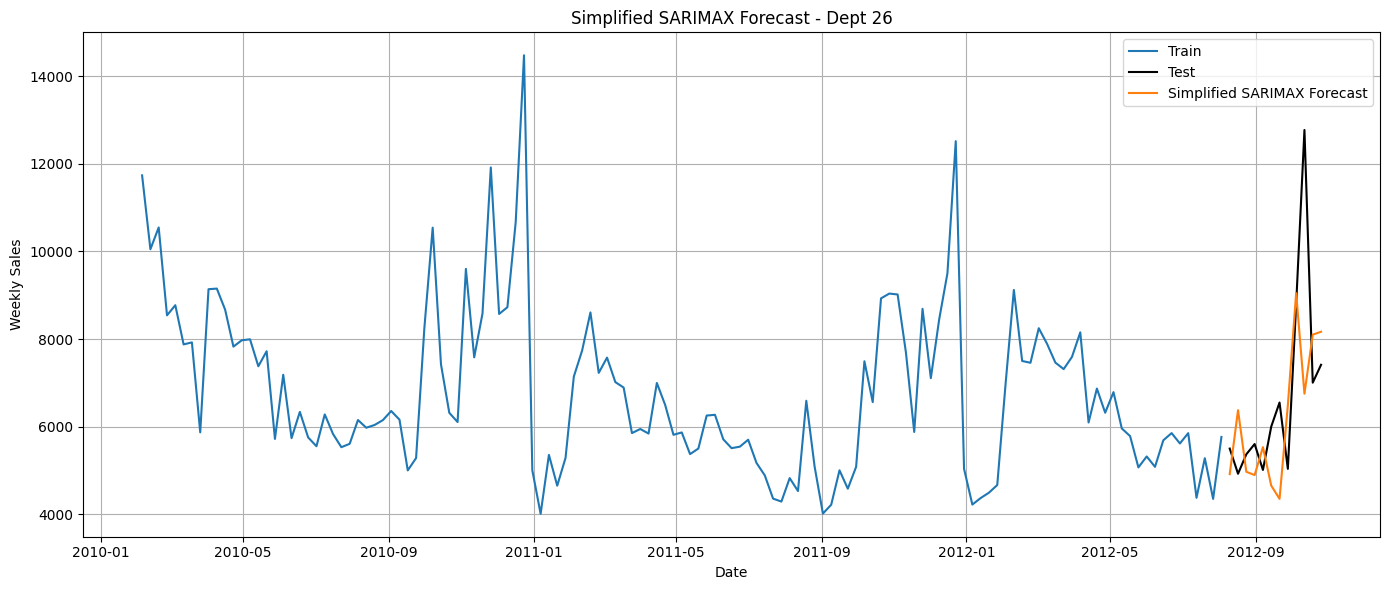

(np.float64(2046.1178929410048),
 1399.8703186064424,
 np.float64(19.283402623781864))

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test', color='black')
plt.plot(test.index, simplified_forecast, label='Simplified SARIMAX Forecast')
plt.title('Simplified SARIMAX Forecast - Dept 26')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

simplified_metrics

### 🌲 Random Forest Model Training
Using Random Forest Regressor with lag and rolling features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

### 🛠️ Feature Engineering

In [ ]:
# Feature Engineering for Machine Learning
ml_data = dept_26.copy()
ml_data['Week'] = ml_data.index.isocalendar().week
ml_data['Year'] = ml_data.index.year
ml_data['Month'] = ml_data.index.month
ml_data['Day'] = ml_data.index.day
ml_data['Lag_1'] = ml_data['Weekly_Sales'].shift(1)
ml_data['Lag_2'] = ml_data['Weekly_Sales'].shift(2)
ml_data['Rolling_Mean_4'] = ml_data['Weekly_Sales'].shift(1).rolling(window=4).mean()
ml_data.dropna(inplace=True)

In [ ]:
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday',
            'Week', 'Year', 'Month', 'Day', 'Lag_1', 'Lag_2', 'Rolling_Mean_4']
target = 'Weekly_Sales'

X = ml_data[features]
y = ml_data[target]

In [ ]:
X_train, X_test = X.iloc[:-12], X.iloc[-12:]
y_train, y_test = y.iloc[:-12], y.iloc[-12:]

### 🌲 Random Forest Model Training
Using Random Forest Regressor with lag and rolling features.

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [ ]:
rf_metrics = evaluate_forecast(y_test, rf_pred)
xgb_metrics = evaluate_forecast(y_test, xgb_pred)

### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

### 🌲 Random Forest Model

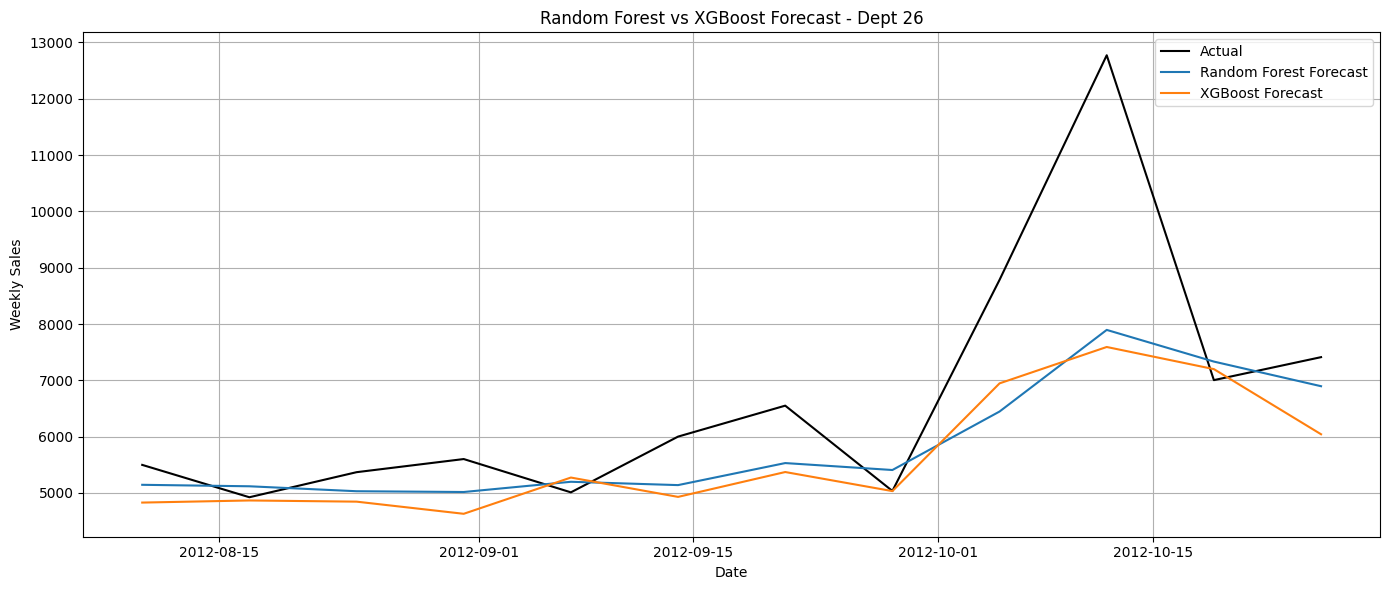

((np.float64(1638.2289274459495),
  997.7728083333341,
  np.float64(12.053427762642215)),
 (np.float64(1741.8152135052694),
  1110.0525618489582,
  np.float64(13.692701437384121)))

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='black')
plt.plot(y_test.index, rf_pred, label='Random Forest Forecast')
plt.plot(y_test.index, xgb_pred, label='XGBoost Forecast')
plt.title('Random Forest vs XGBoost Forecast - Dept 26')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

rf_metrics, xgb_metrics

### 🤖 LSTM Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(ml_data[features])
y_scaled = scaler_y.fit_transform(ml_data[[target]])

In [ ]:
X_seq, y_seq = [], []
window_size = 4
for i in range(window_size, len(X_scaled)):
    X_seq.append(X_scaled[i-window_size:i])
    y_seq.append(y_scaled[i])
X_seq, y_seq = np.array(X_seq), np.array(y_seq)

X_train, X_test = X_seq[:-12], X_seq[-12:]
y_train, y_test = y_seq[:-12], y_seq[-12:]

In [ ]:
X_seq_train, X_seq_test = X_seq[:-12], X_seq[-12:]
y_seq_train, y_seq_test = y_seq[:-12], y_seq[-12:]

### 🤖 LSTM Deep Learning Model

In [ ]:
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_seq_train.shape[1], X_seq_train.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_seq_train, y_seq_train, epochs=50, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 🤖 LSTM Deep Learning Model

In [ ]:
lstm_pred_scaled = lstm_model.predict(X_seq_test)
lstm_pred = scaler.inverse_transform(np.hstack((np.zeros((len(lstm_pred_scaled), len(features))), lstm_pred_scaled)))[:, -1]
y_true = scaler.inverse_transform(np.hstack((np.zeros((len(y_seq_test), len(features))), y_seq_test)))[:, -1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


### 🤖 LSTM Deep Learning Model

In [ ]:
lstm_metrics = evaluate_forecast(y_true, lstm_pred)

### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

### 🤖 LSTM Deep Learning Model

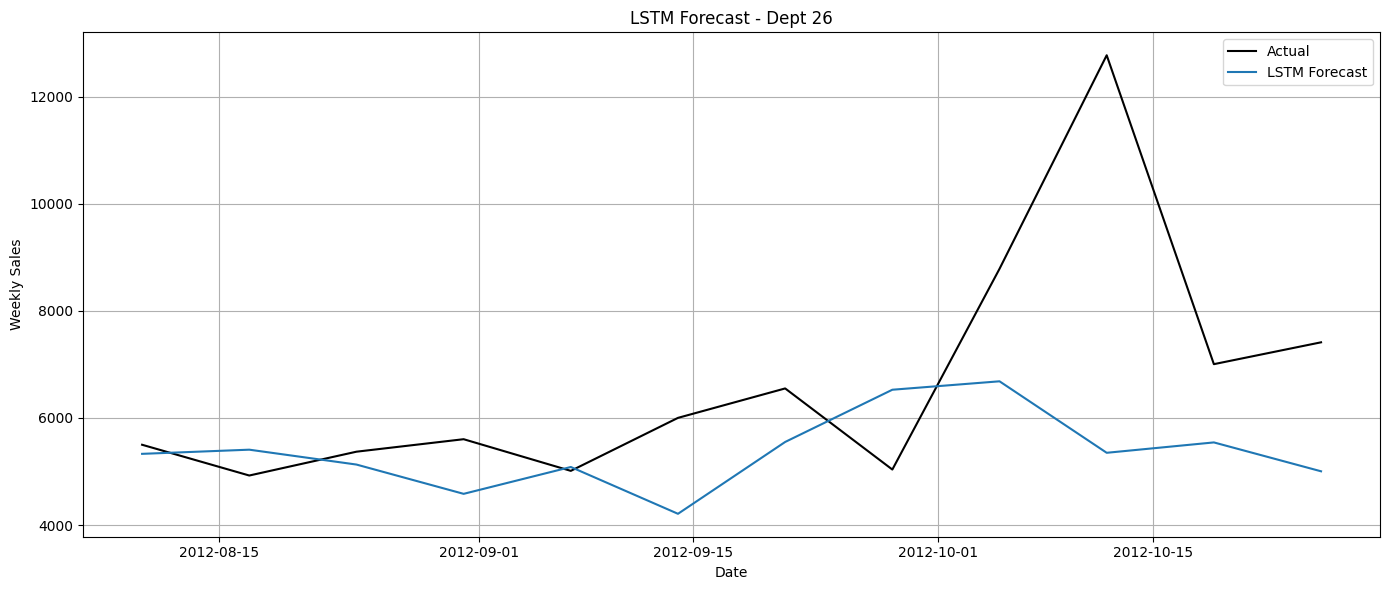

(np.float64(2504.565048946582),
 1638.6063634648701,
 np.float64(20.594998598282896))

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_true, label='Actual', color='black')
plt.plot(y_test.index, lstm_pred, label='LSTM Forecast')
plt.title('LSTM Forecast - Dept 26')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

lstm_metrics

### 🤖 LSTM Deep Learning Model

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')

# 7. Train with EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, callbacks=[early_stop])

# 8. Predict and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


### 🤖 LSTM Deep Learning Model

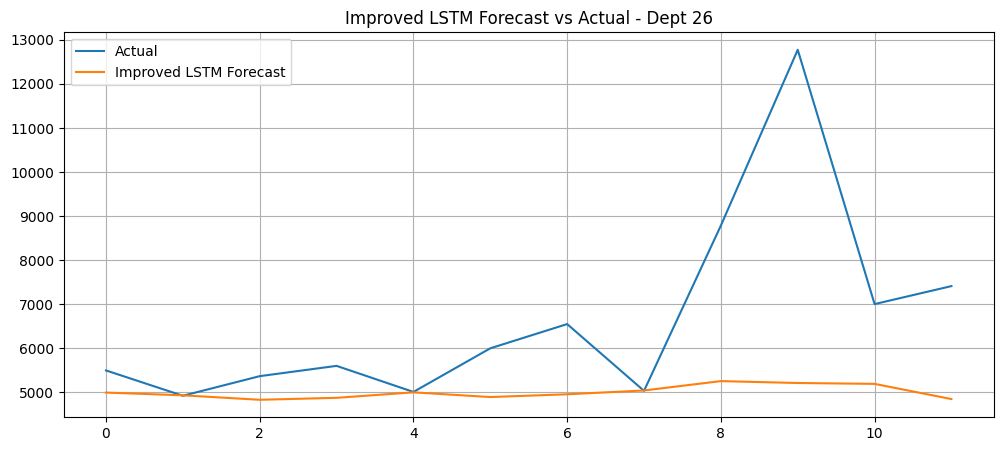

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Improved LSTM Forecast')
plt.title('Improved LSTM Forecast vs Actual - Dept 26')
plt.legend()
plt.grid(True)
plt.show()

### 📊 Model Evaluation
Evaluation using RMSE and MAE metrics.

### 🤖 LSTM Deep Learning Model

In [ ]:
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"LSTM RMSE: {rmse:.2f}")

LSTM RMSE: 2649.84


### 🧙‍♂️ Prophet Forecasting
Facebook Prophet is used here for time series forecasting.

### 🧙 Prophet Forecasting

In [ ]:
from prophet import Prophet

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
dept_26 = df[df['Dept'] == 26.0].copy()
dept_26 = dept_26.dropna(subset=['Date'])
dept_26.sort_values('Date', inplace=True)

### 🧙 Prophet Forecasting

In [ ]:
prophet_df = dept_26[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

### 🧙 Prophet Forecasting

In [ ]:
prophet_train = prophet_df.iloc[:-12]
prophet_test = prophet_df.iloc[-12:]

prophet_train.head()

,ds,y
1,2010-02-05,11737.12
109,2010-02-12,10050.92
204,2010-02-19,10547.60
259,2010-02-26,8541.14
326,2010-03-05,8772.65


### 🧙 Prophet Forecasting

In [ ]:
prophet_train = prophet_train[pd.to_datetime(prophet_train['ds'], errors='coerce').notnull()]

### 🧙‍♂️ Prophet Forecasting
Facebook Prophet is used here for time series forecasting.

### 🧙 Prophet Forecasting

In [ ]:
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.fit(prophet_train)
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4fym2ua/css5g3mw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4fym2ua/n8gut4fu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65884', 'data', 'file=/tmp/tmpo4fym2ua/css5g3mw.json', 'init=/tmp/tmpo4fym2ua/n8gut4fu.json', 'output', 'file=/tmp/tmpo4fym2ua/prophet_modelkymqbyyz/prophet_model-20250626181856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 🧙 Prophet Forecasting

In [ ]:
forecast.set_index('ds', inplace=True)

y_pred = []
for d in prophet_test['ds']:
    nearest = forecast.index.get_indexer([d], method='nearest')[0]
    yhat = forecast.iloc[nearest]['yhat']
    y_pred.append(yhat)

y_pred = np.array(y_pred)
y_true = prophet_test['y'].values


### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

### 🧙 Prophet Forecasting

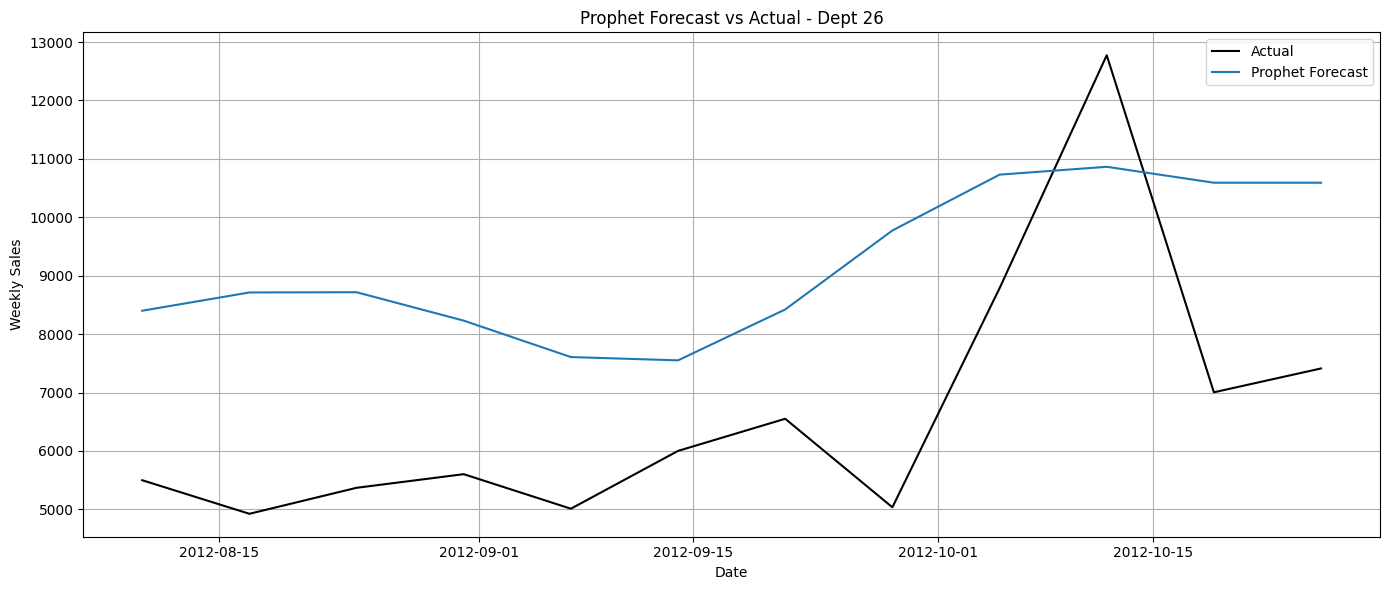

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(prophet_test['ds'], y_true, label='Actual', color='black')
plt.plot(prophet_test['ds'], y_pred, label='Prophet Forecast')
plt.title('Prophet Forecast vs Actual - Dept 26')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 🧙‍♂️ Prophet Forecasting
Facebook Prophet is used here for time series forecasting.

### 🧙 Prophet Forecasting

In [ ]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print(f"Prophet RMSE: {rmse:.2f}")
print(f"Prophet MAE: {mae:.2f}")

Prophet RMSE: 2977.43
Prophet MAE: 2836.80


### 🌲 Random Forest Model Training
Using Random Forest Regressor with lag and rolling features.

### 🛠️ Feature Engineering

In [ ]:
# Use dept_26 from previous cell
dept_26 = df[df['Dept'] == 26.0].copy()
dept_26['Date'] = pd.to_datetime(dept_26['Date'], errors='coerce')
dept_26 = dept_26.dropna(subset=['Date']).sort_values('Date')

# Feature engineering
dept_26['Week'] = dept_26['Date'].dt.isocalendar().week
dept_26['Year'] = dept_26['Date'].dt.year
dept_26['Month'] = dept_26['Date'].dt.month
dept_26['Day'] = dept_26['Date'].dt.day
dept_26['Lag_1'] = dept_26['Weekly_Sales'].shift(1)
dept_26['Lag_2'] = dept_26['Weekly_Sales'].shift(2)
dept_26['Rolling_Mean_4'] = dept_26['Weekly_Sales'].shift(1).rolling(window=4).mean()
dept_26.dropna(inplace=True)

# Features and target
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday',
            'Week', 'Year', 'Month', 'Day', 'Lag_1', 'Lag_2', 'Rolling_Mean_4']
target = 'Weekly_Sales'

# Scale data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(dept_26[features])
y_scaled = scaler_y.fit_transform(dept_26[[target]])

# Train/test split
X_train, X_test = X_scaled[:-12], X_scaled[-12:]
y_train, y_test = y_scaled[:-12], y_scaled[-12:]
test_index = dept_26.iloc[-12:].index

### 🌲 Random Forest Model Training
Using Random Forest Regressor with lag and rolling features.

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.ravel())

# Predict
rf_pred_scaled = rf.predict(X_test).reshape(-1, 1)
rf_pred = scaler_y.inverse_transform(rf_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Save model + scalers for deployment
import joblib
joblib.dump(rf, 'random_forest_model.joblib')
joblib.dump(scaler_X, 'scaler_X.joblib')
joblib.dump(scaler_y, 'scaler_y.joblib')

['scaler_y.joblib']

In [ ]:
rf_pred[:3], y_true[:3]

(array([[5183.1016],
        [5078.5704],
        [5059.0604]]),
 array([[5498.9 ],
        [4924.3 ],
        [5369.29]]))

### 📈 Forecast Visualization
The following chart shows predicted vs actual weekly sales.

### 🌲 Random Forest Model

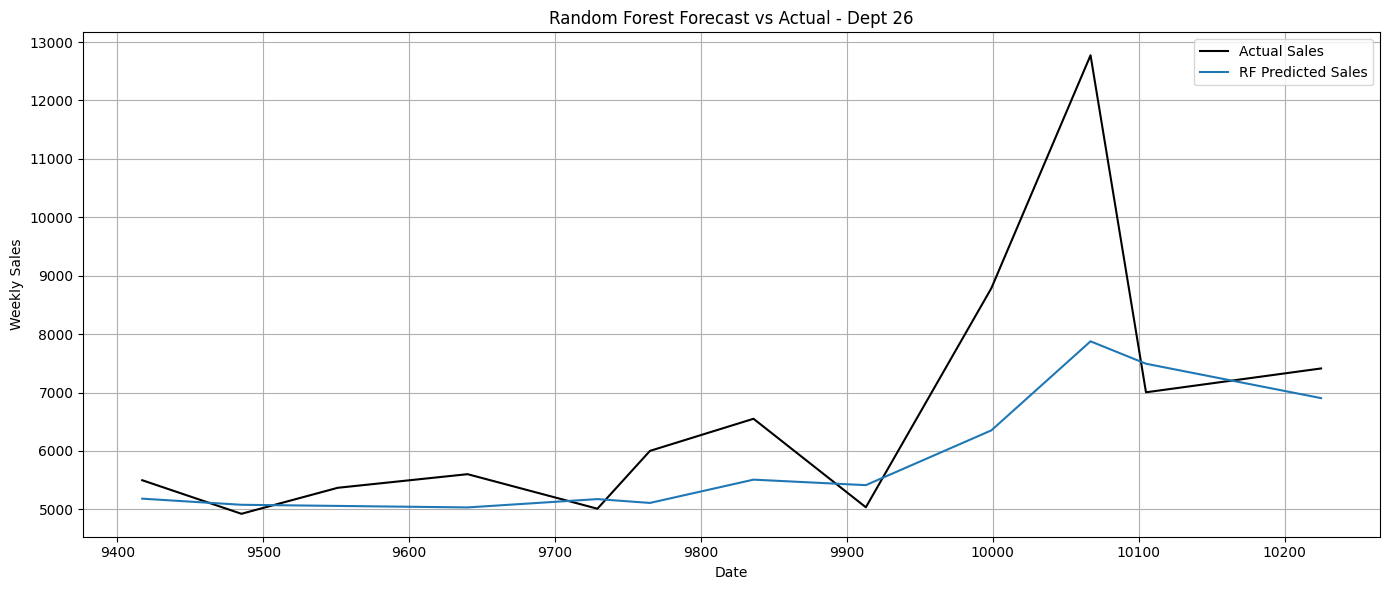

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(test_index, y_true, label='Actual Sales', color='black')
plt.plot(test_index, rf_pred, label='RF Predicted Sales')
plt.title('Random Forest Forecast vs Actual - Dept 26')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install streamlit pyngrok --quiet

In [ ]:
!ngrok config add-authtoken 2z3gmKnIoovyYLr3dbBGTpK34Nf_UjDNfKAytCyKQab5RVTX

In [ ]:
!streamlit run app.py &>/content/logs.txt &

from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f"🚀 App running at: {public_url}")